In previous notebook we replace the missing Categorical value with Most frequent value. In this we are going to replace Missing NA categorical value by Random Sampling

In [1]:
import pandas as pd
import numpy as np 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
data= pd.read_csv('/Users/nandrajog/Downloads/House-price.csv',low_memory=False)

In [3]:
croped_data = data[['BsmtQual','FireplaceQu','GarageType','SalePrice']]

In [4]:
pd.DataFrame(croped_data.isna().sum())

,0
BsmtQual,37
FireplaceQu,690
GarageType,81
SalePrice,0


In [42]:
X_train,X_test,Y_train,Y_test = train_test_split(croped_data[['BsmtQual','FireplaceQu','GarageType','SalePrice']],
                                                 croped_data.SalePrice,train_size = 0.8,random_state=0)

In [43]:
x = X_train.copy()

In [44]:
x['GarageType'].value_counts()

Attchd     696
Detchd     315
BuiltIn     74
Basment     14
2Types       6
CarPort      5
Name: GarageType, dtype: int64

In [45]:
def Impute_na(df_train,df_test,col):
    most_frequent = df_train[col].value_counts().index[0]
    df_train[col+'_frequent'] = df_train[col].fillna(most_frequent)
    df_test[col+'_frequent'] = df_test[col].fillna(most_frequent)
    
    random = np.random.choice(df_train[col].dropna())
    print(random)
    df_train[col+'_random'] = df_train[col].fillna(random)
    df_test[col+'_random'] = df_test[col].fillna(random)
    

In [46]:
# Impute_na(X_train,'BsmtQual')

In [47]:
for col in ['BsmtQual','FireplaceQu','GarageType']:
    Impute_na(X_train,X_test,col)
#     Impute_na(X_test,col)

Gd
TA
Basment


In [48]:
X_train.isna().sum()

BsmtQual                 28
FireplaceQu             551
GarageType               58
SalePrice                 0
BsmtQual_frequent         0
BsmtQual_random           0
FireplaceQu_frequent      0
FireplaceQu_random        0
GarageType_frequent       0
GarageType_random         0
dtype: int64

In [49]:
# X_train[X_train['BsmtQual_random']].value_counts().plot.bar()

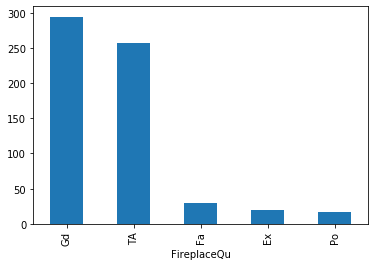

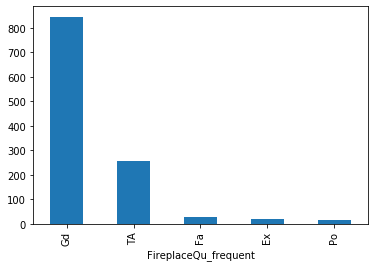

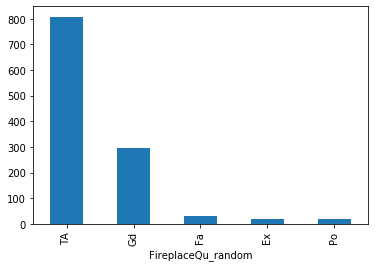

In [50]:
for col in ['FireplaceQu','FireplaceQu_frequent','FireplaceQu_random']:
    X_train.groupby([col])[col].count().sort_values(ascending=False).plot.bar()
    plt.show()

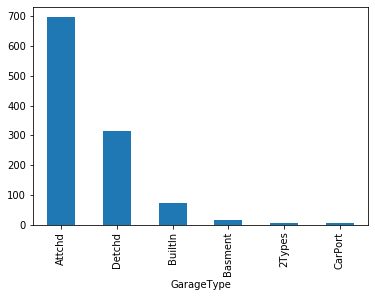

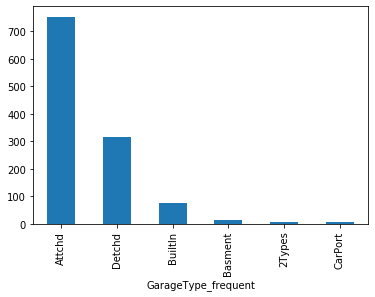

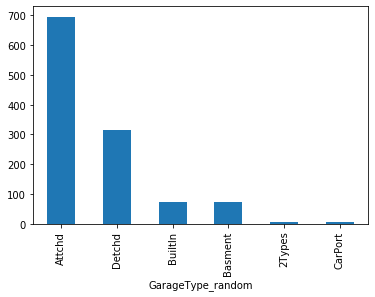

In [51]:
for col in ['GarageType','GarageType_frequent','GarageType_random']:
    X_train.groupby([col])[col].count().sort_values(ascending=False).plot.bar()
    plt.show()

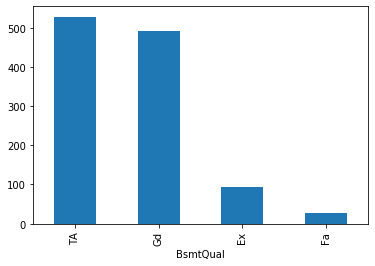

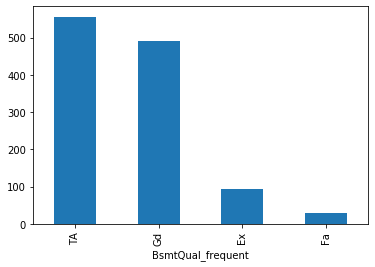

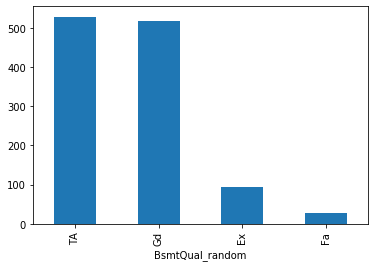

In [52]:
for col in ['BsmtQual','BsmtQual_frequent','BsmtQual_random']:
    X_train.groupby([col])[col].count().sort_values(ascending=False).plot.bar()
    plt.show()

In [53]:
#Let's Convert categorical into Numeric values

In [54]:
X_train.BsmtQual.unique()

array(['Ex', 'TA', 'Gd', nan, 'Fa'], dtype=object)

Random

In [55]:
for col in ['BsmtQual_random','FireplaceQu_random','GarageType_random']:
    labels_dict = {k:i for i,k in enumerate(X_train[col].unique())}
    X_train.loc[:,col] = X_train.loc[:,col].map(labels_dict)
    X_test.loc[:,col] = X_test.loc[:,col].map(labels_dict)
    

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [57]:
clf = LinearRegression()
clf.fit(X_train[['BsmtQual_random','FireplaceQu_random','GarageType_random']],Y_train)
predict_train = clf.predict(X_train[['BsmtQual_random','FireplaceQu_random','GarageType_random']])
print("Train Set")
print("MSE {}".format(mean_squared_error(predict_train,Y_train)))
print("Test Set")
predict_test = clf.predict(X_test[['BsmtQual_random','FireplaceQu_random','GarageType_random']])
print("MSE {}".format(mean_squared_error(predict_test,Y_test)))

Train Set
MSE 5389612584.186483
Test Set
MSE 5928632893.599409


Most Frequent

In [58]:
for col in ['BsmtQual_frequent','FireplaceQu_frequent','GarageType_frequent']:
    labels_dict = {k:i for i,k in enumerate(X_train[col].unique())}
    X_train.loc[:,col] = X_train.loc[:,col].map(labels_dict)
    X_test.loc[:,col] = X_test.loc[:,col].map(labels_dict)

In [59]:
clf = LinearRegression()
clf.fit(X_train[['BsmtQual_frequent','FireplaceQu_frequent','GarageType_frequent']],Y_train)
predict_train = clf.predict(X_train[['BsmtQual_frequent','FireplaceQu_frequent','GarageType_frequent']])
print("Train Set")
print("MSE {}".format(mean_squared_error(predict_train,Y_train)))
print("Test Set")
predict_test = clf.predict(X_test[['BsmtQual_frequent','FireplaceQu_frequent','GarageType_frequent']])
print("MSE {}".format(mean_squared_error(predict_test,Y_test)))

Train Set
MSE 5945910923.453074
Test Set
MSE 6569703369.803234


In [64]:
X_train.FireplaceQu_frequent

618     0
870     0
92      0
817     0
302     1
       ..
763     0
835     0
1216    0
559     1
684     0
Name: FireplaceQu_frequent, Length: 1168, dtype: int64